# Lab - 0 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns

In [45]:
df1 = pd.read_csv('crime1.txt',sep= '\t').reset_index()
df2 = pd.read_csv('crime2.txt',sep= '\t').reset_index()

In [46]:
# Peak at the data ( crime 1)
df1.head()

,index,Assault,UrbanPop
0,Alabama,236,58
1,Alaska,263,48
2,Arizona,294,80
3,Arkansas,190,50
4,California,276,91


In [47]:
# Peak at the data ( df2 ) ( crime 2)

df2.head()

,index,Rape,UrbanPop
0,Alabama,21.2,58
1,Alaska,44.5,48
2,Arizona,31.0,80
3,Arkansas,19.5,50
4,California,40.6,91


In [48]:
print('lenght of df1 : ' + str(len(df1)))
print('lenght of df2 : ' + str(len(df2)))

lenght of df1 : 50
lenght of df2 : 50


In [77]:
df_merged = pd.merge(df1,df2,on= ['index','UrbanPop'])
df_merged = df_merged.rename(columns = {'index':'State'})
df_merged

,State,Assault,UrbanPop,Rape
0,Alabama,236,58,21.2
1,Alaska,263,48,44.5
2,Arizona,294,80,31.0
3,Arkansas,190,50,19.5
4,California,276,91,40.6
5,Colorado,204,78,38.7
6,Connecticut,110,77,11.1
7,Delaware,238,72,15.8
8,Florida,,80,31.9
9,Georgia,211,60,25.8


In [78]:
# We see that florida state lack the Assault data so we will remove for now that row. 

df_merged = df_merged[~(df_merged.State == 'Florida')]


In [79]:
# Data Manipulation
df_merged['Assault'] = pd.to_numeric(df_merged['Assault'])

# Data plotting - (couple of versions)

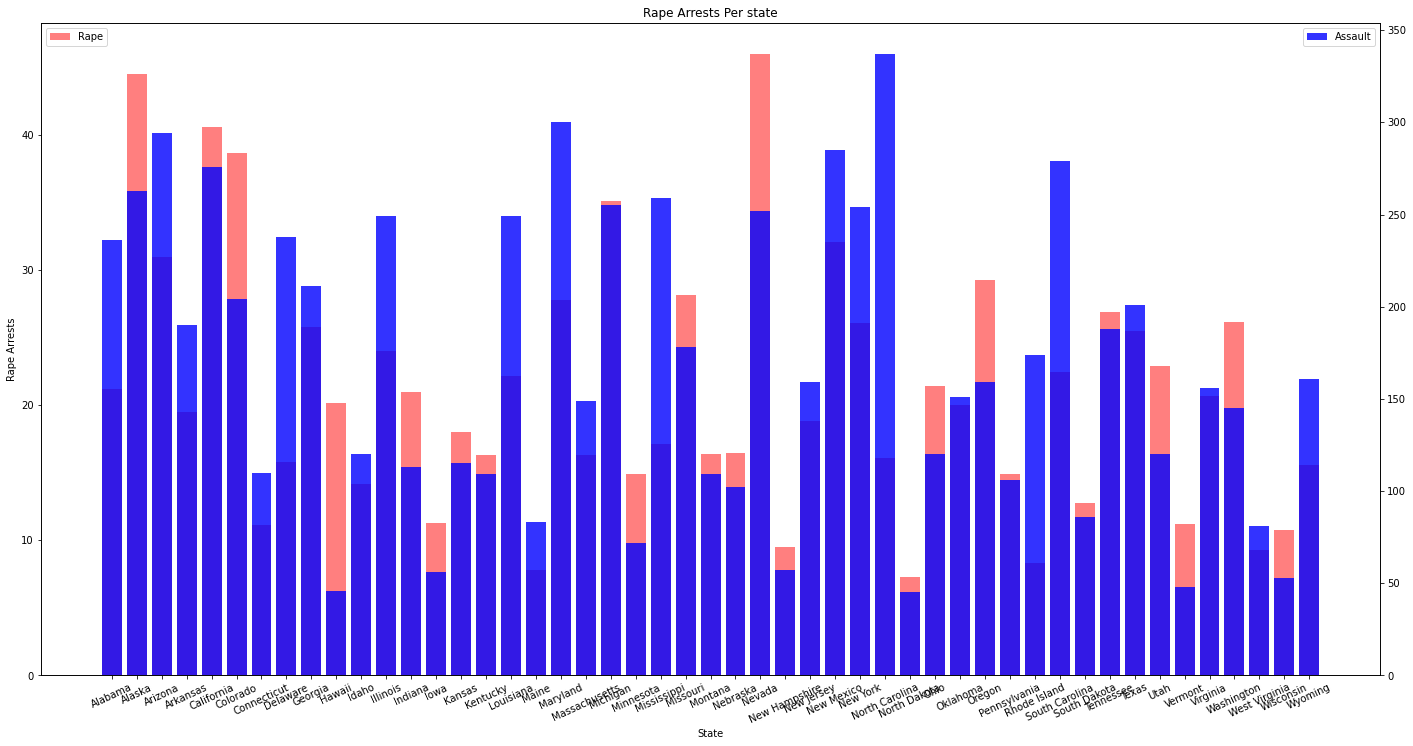

In [94]:
# Creating figure and axes
fig, ax = plt.subplots(figsize = (24,12))
# Plot
ax.bar(df_merged.State, df_merged.Rape, color = 'r',alpha = 0.5, label = 'Rape')
# Rotating xticks
plt.xticks(rotation=25)
ax.legend(loc = 2)
# Name axes 
plt.xlabel('State')
plt.ylabel('Rape Arrests')

# Defining multiple y-axes
ax2 = ax.twinx()

ax2.bar(df_merged.State, df_merged.Assault, color='blue',alpha = 0.8,label = 'Assault')

plt.title('Rape Arrests Per state')
ax2.legend()

plt.show()

This version is not my favorite due to the fact that the y axes are not proportional - but we can still see that number of Assaults is mich higher than number of Rape arrests. 

Text(0, 0.5, 'Rape arrests')

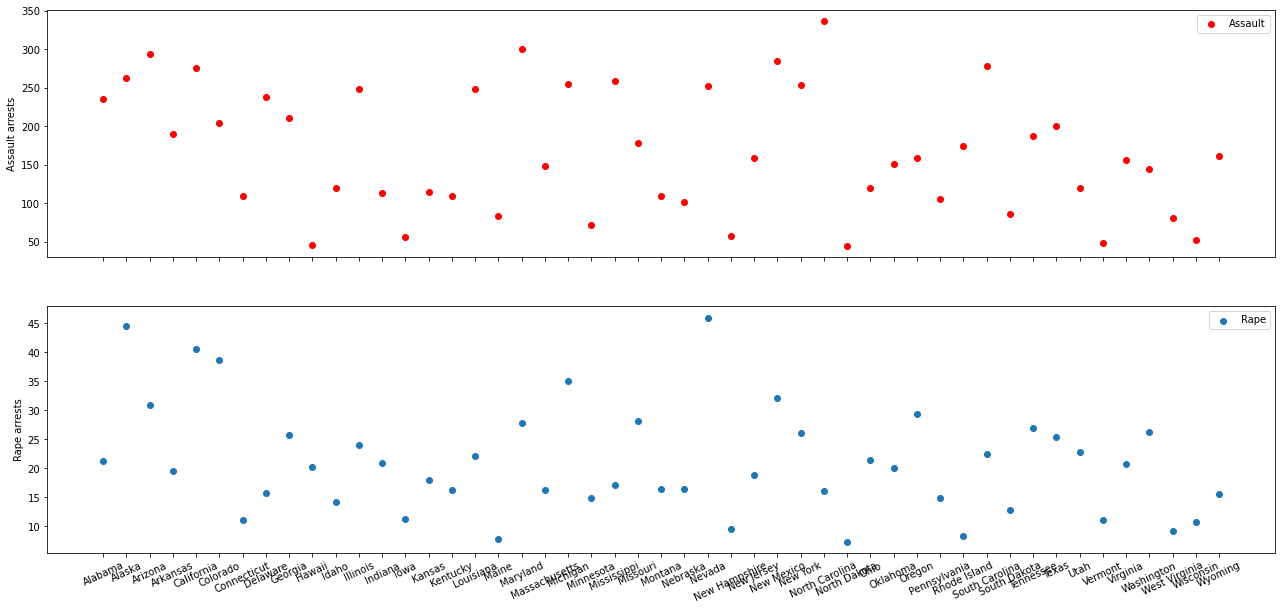

In [109]:
# Version 2 ( I prefer version 2)


fig, ax = plt.subplots(2, figsize=(22, 10), sharex=True)

ax[0].scatter(df_merged['State'], df_merged['Assault'], label='Assault',color= 'r')
plt.xticks(rotation = 25)
ax[0].legend()
ax[0].set_ylabel('Assault arrests')



ax[1].scatter(df_merged['State'], df_merged['Rape'], label='Rape')
ax[1].legend()
ax[1].set_ylabel('Rape arrests')



In [121]:
df_merged

,State,Assault,UrbanPop,Rape
0,Alabama,236,58,21.2
1,Alaska,263,48,44.5
2,Arizona,294,80,31.0
3,Arkansas,190,50,19.5
4,California,276,91,40.6
5,Colorado,204,78,38.7
6,Connecticut,110,77,11.1
7,Delaware,238,72,15.8
9,Georgia,211,60,25.8
10,Hawaii,46,83,20.2


In [127]:
# Outliers 
def getOutliers(df,prop_threshold):
    df['arrests_prop'] = df['Rape']/df['UrbanPop']
    return df[df.arrests_prop > prop_threshold]
    
    

df_outliers =  getOutliers(df_merged,0.9)

In [128]:
df_outliers

,State,Assault,UrbanPop,Rape,arrests_prop
1,Alaska,263,48,44.5,0.927083


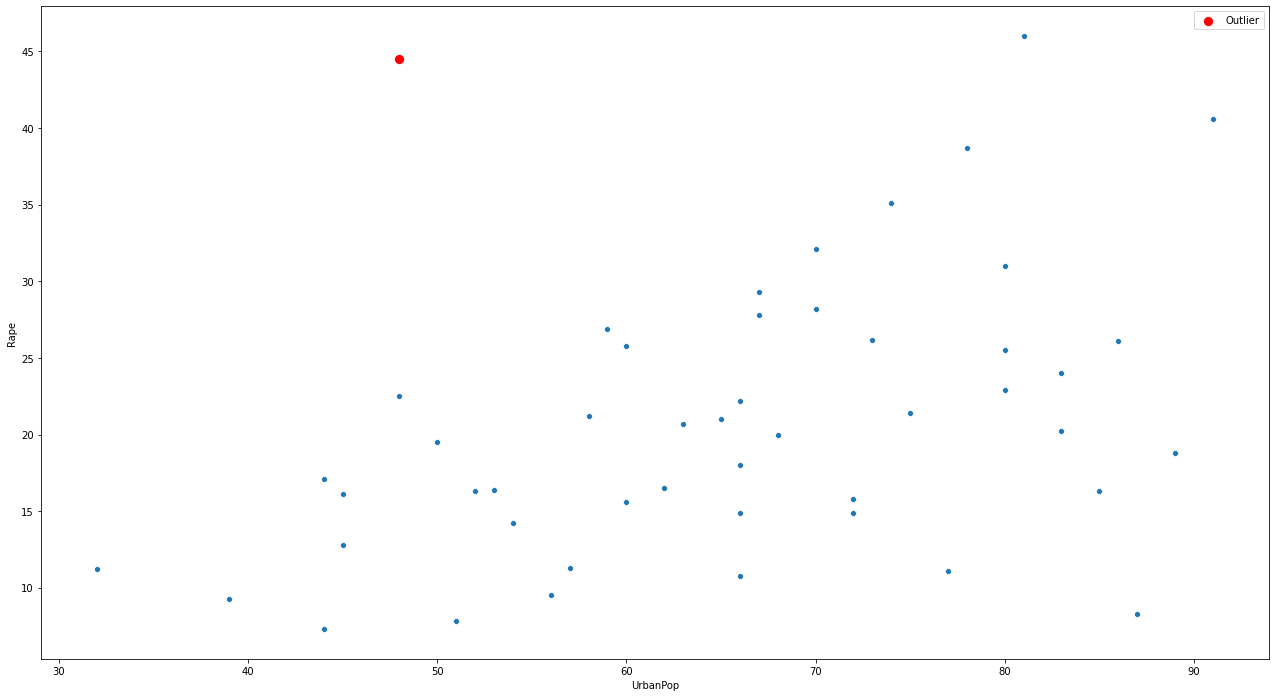

In [137]:
plt.figure(figsize=(22,12))

g = sns.scatterplot(x='UrbanPop', y ='Rape', data = df_merged)
g1 = sns.scatterplot(x ='UrbanPop', y = 'Rape', data= df_outliers, color = 'red', s =100,label = 'Outlier')

g.legend()

plt.show()

<Figure size 1152x576 with 0 Axes>

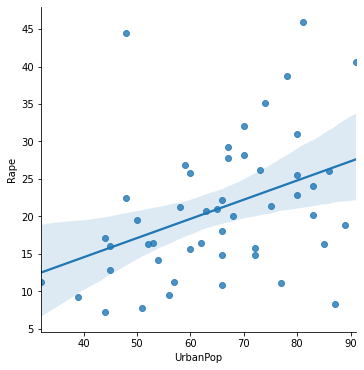

In [145]:
# Linear Regression plot and analysis 


# plot 

plt.figure(figsize=(16,8))

g = sns.pairplot(df_merged,kind='reg',height=5,x_vars=['UrbanPop'],y_vars=['Rape'])
plt.show()

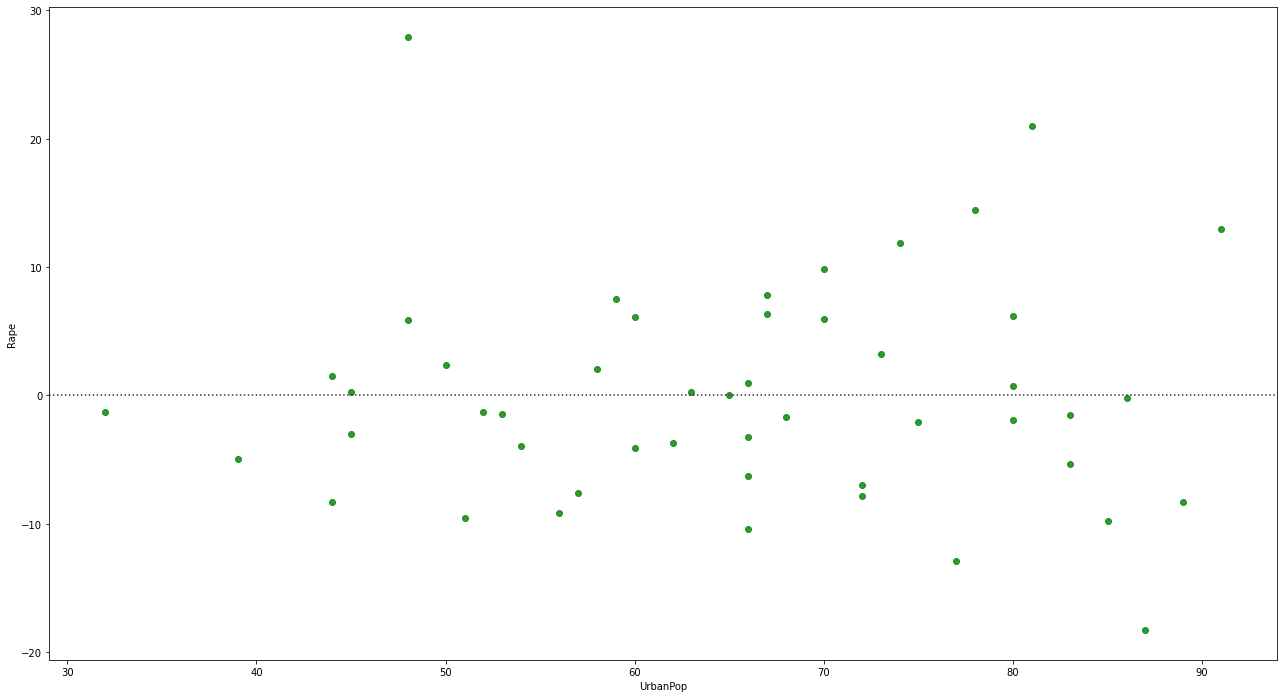

In [143]:
# Plotting residuals 
plt.figure(figsize=(22,12))
sns.residplot(x='UrbanPop', y='Rape', data=df_merged, color='green')

Trends? 

The variation is getting bigger as the UrbanPop is getting bigger. 

In [228]:
X = df_merged['UrbanPop'].values.reshape(-1,1)
y = df_merged['Rape'].values.reshape(-1,1)

lr = LinearRegression()

lr.fit(X,y)

Y_pred = lr.predict(X) # Make predictions

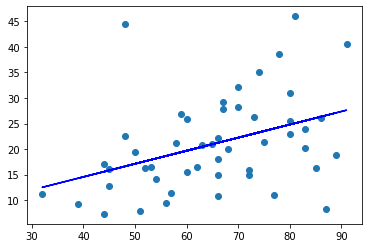

In [229]:
#Plotting

plt.scatter(X, y)
plt.plot(X, Y_pred, color='blue')
plt.show()

In [230]:
# Without the outlier 


df_outliers = getOutliers(df_merged,0.9)

df_merged_WithoutOutliers = df_merged[~ (df_merged.State.isin(df_outliers.State))]


X_modified = df_merged_WithoutOutliers['UrbanPop'].values.reshape(-1,1)
y_modified = df_merged_WithoutOutliers['Rape'].values.reshape(-1,1)

lr = LinearRegression()

lr.fit(X_modified,y_modified)

Y_pred_1 = lr.predict(X_modified) # Make predictions

In [234]:
# Function for plotting (comparing between the Lr )

def plot_lr(x,y,X_modified,predictions_1,predictions_2,color_1,color_2, xlabel, ylabel,title):
    plt.scatter(x,y)
    plt.plot(x, predictions_1, color=color_1)
    plt.plot(X_modified, predictions_2, color=color_2)
    plt.xlabel(xlabel,fontsize = 15)
    plt.ylabel(ylabel,fontsize = 15)
    plt.title(title,fontsize = 20)

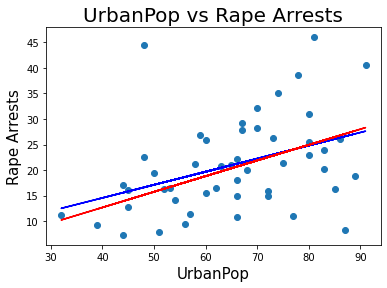

In [235]:
plot_lr(X,y,X_modified,Y_pred,Y_pred_1,'blue','red','UrbanPop','Rape Arrests','UrbanPop vs Rape Arrests')